<a href="https://colab.research.google.com/github/H-E-L-P/dmu_products/blob/master/dmu31/dmu31_Examples/HELP_VO_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ![](https://avatars1.githubusercontent.com/u/7880370?s=75&v=4)  Virtual Observatory at susseX (VOX) Introduction

---
The Virtual Observatory at susseX (VOX) is a virtual observatory server built using the German Astrophysical Virtual
Observatory (GAVO) DaCHS software: [*Data Center Helper Suite*](https://dachs-doc.readthedocs.io). VOX contains both the maps and the catalogue data. 

Maps are available through the *Simple Image Access Protocol* (SIAP). In particular, VOX makes is possible to get image cutouts at a given position.

The catalogue data is gathered into a single table across all the coverage that
users can query using the *Table Access Protocol* (TAP) with compliant
software like TOPCAT , STILTS or
[PyVO](https://pyvo.readthedocs.io). This allows users to make
sophisticated queries or to remotely crossmatch their catalogues with HELP data.

In this notebook, we will go through some simple examples to introduce you to HELP data and using the VOX.



In [1]:
!pip install pyvo

     |████████████████████████████████| 808kB 5.4MB/s 
  Created wheel for pyvo: filename=pyvo-1.1-cp37-none-any.whl size=801573 sha256=195f3dcac6eb6b05c1fd81081b7008530df2dc4ad2637050e5338c8960b6ea1d
  Stored in directory: /root/.cache/pip/wheels/d9/00/df/656aac56938f1c83dfcb361346f74101ce1f8c849fc93b18dc
  Created wheel for mimeparse: filename=mimeparse-0.1.3-cp37-none-any.whl size=3864 sha256=d69b2ae2bcbcc9c5b2f656113ab889a9e54b60b53016313a96a6028ca418e83e
  Stored in directory: /root/.cache/pip/wheels/54/ca/c7/3db47cc5c748286db22a7fab43ccf985903d2b9ca119de16ab
Successfully built pyvo mimeparse


In [26]:
!pip install aplpy

     |████████████████████████████████| 92kB 4.1MB/s 
     |████████████████████████████████| 1.1MB 10.3MB/s 
     |████████████████████████████████| 378kB 35.4MB/s 
     |████████████████████████████████| 1.3MB 28.7MB/s 
     |████████████████████████████████| 215kB 44.0MB/s 
  Created wheel for pyregion: filename=pyregion-2.0-cp37-cp37m-linux_x86_64.whl size=309329 sha256=26f56277488256d6975079cd889691abea6a6049e2483ad158b80cb1252ca7bb
  Stored in directory: /root/.cache/pip/wheels/ca/2c/2b/c95350df7d42ba9044b7528c5ba549bead550433b189008a7f
Successfully built pyregion


In [27]:
from astropy.io import ascii, fits
from astropy import units as u
from astropy.coordinates import SkyCoord
import aplpy
import numpy as np
from astropy.table import Table
import pylab as plt
import seaborn as sns
%matplotlib inline
from astropy import wcs
import pyvo as vo

## Example 1: Get sources located near a single position
A very simple use case to get started with is to find all sources close to a specific position. We do this by using the TAP protocol and writing queries in  the Astronomical Data Query Language (ADQL), a dialect of the Standard Query Language SQL. Its purpose is to give you a formal language to specify what data you are interested in.

To get started using ADQL, try this [ADQL course](http://docs.g-vo.org/adql). There are plenty of introductions SQL itself, which are perfectly useful for learning ADQL. Check your local bookstore. Online, [A Gentle Introduction to SQL](http://sqlzoo.net/) or chapter three of [Practical PostgreSQL](http://www.faqs.org/docs/ppbook/book1.htm) might be useful; for the purposes of learning ADQL, you can skip everything talking about "DDL" in general introductions.

For this example we need to specify a right accension and declination, and a search radius

In [3]:
RA=161.63
Dec=59.17
radius=0.028

We also need to create a TAP service that connects to VOX which we can search

In [4]:

service = vo.dal.TAPService("https://herschel-vos.phys.sussex.ac.uk/__system__/tap/run/tap")

Having connected to the service, we now need to write our query, send it to VOX and get our results back.

To write the query, we:
* use the `SELECT` operational statement and ask for the `TOP 10000` results (VOX has a default maximum return of 2000 rows, so we explicitly specify 10000 to override this). 
* Tell the VO to get the results `FROM herschelhelp.main`, i.e. the main HELP masterlist. You can find the other tables you could use [here](https://herschel-vos.phys.sussex.ac.uk/__system__/dc_tables/list/form).
* Specify that only objects within our search radius from our chosen point are returned. We do this using the `WHERE` condition and `CONTAINS(POINT('ICRS', ra, dec),CIRCLE('ICRS',"+str(RA)+", "+str(Dec)+","+str(radius)+" ))")` The `CONTAINS()` return either 0 if False and 1 if True. 



In [5]:
resultset = service.search("SELECT TOP 10000 * FROM herschelhelp.main WHERE 1=CONTAINS(POINT('ICRS', ra, dec),CIRCLE('ICRS',"+str(RA)+", "+str(Dec)+","+str(radius)+" ))")

The above command can take a couple of seconds to run (depending on how complicated or large the query). We can then foramt the results into a table.

In [6]:
masterlist=resultset.to_table()

In [7]:
masterlist

field,help_id,ra,dec,hp_idx,ebv,redshift,zspec,zspec_qual,zspec_association_flag,stellarity,stellarity_origin,f_90prime_g,ferr_90prime_g,f_ap_90prime_g,ferr_ap_90prime_g,m_90prime_g,merr_90prime_g,m_ap_90prime_g,merr_ap_90prime_g,flag_90prime_g,f_90prime_r,ferr_90prime_r,f_ap_90prime_r,ferr_ap_90prime_r,m_90prime_r,merr_90prime_r,m_ap_90prime_r,merr_ap_90prime_r,flag_90prime_r,f_90prime_z,ferr_90prime_z,f_ap_90prime_z,ferr_ap_90prime_z,m_90prime_z,merr_90prime_z,m_ap_90prime_z,merr_ap_90prime_z,flag_90prime_z,f_acs_f435w,ferr_acs_f435w,f_ap_acs_f435w,ferr_ap_acs_f435w,m_acs_f435w,merr_acs_f435w,m_ap_acs_f435w,merr_ap_acs_f435w,flag_acs_f435w,f_acs_f606w,ferr_acs_f606w,f_ap_acs_f606w,ferr_ap_acs_f606w,m_acs_f606w,merr_acs_f606w,m_ap_acs_f606w,merr_ap_acs_f606w,flag_acs_f606w,f_acs_f775w,ferr_acs_f775w,f_ap_acs_f775w,ferr_ap_acs_f775w,m_acs_f775w,merr_acs_f775w,m_ap_acs_f775w,merr_ap_acs_f775w,flag_acs_f775w,f_acs_f814w,ferr_acs_f814w,f_ap_acs_f814w,ferr_ap_acs_f814w,m_acs_f814w,merr_acs_f814w,m_ap_acs_f814w,merr_ap_acs_f814w,flag_acs_f814w,f_acs_f850lp,ferr_acs_f850lp,f_ap_acs_f850lp,ferr_ap_acs_f850lp,m_acs_f850lp,merr_acs_f850lp,m_ap_acs_f850lp,merr_ap_acs_f850lp,flag_acs_f850lp,f_bessell_b,ferr_bessell_b,f_ap_bessell_b,ferr_ap_bessell_b,m_bessell_b,merr_bessell_b,m_ap_bessell_b,merr_ap_bessell_b,flag_bessell_b,f_bessell_i,ferr_bessell_i,f_ap_bessell_i,ferr_ap_bessell_i,m_bessell_i,merr_bessell_i,m_ap_bessell_i,merr_ap_bessell_i,flag_bessell_i,f_bessell_r,ferr_bessell_r,f_ap_bessell_r,ferr_ap_bessell_r,m_bessell_r,merr_bessell_r,m_ap_bessell_r,merr_ap_bessell_r,flag_bessell_r,f_bessell_u,ferr_bessell_u,f_ap_bessell_u,ferr_ap_bessell_u,m_bessell_u,merr_bessell_u,m_ap_bessell_u,merr_ap_bessell_u,flag_bessell_u,f_bessell_v,ferr_bessell_v,f_ap_bessell_v,ferr_ap_bessell_v,m_bessell_v,merr_bessell_v,m_ap_bessell_v,merr_ap_bessell_v,flag_bessell_v,f_cfht12k_b,ferr_cfht12k_b,f_ap_cfht12k_b,ferr_ap_cfht12k_b,m_cfht12k_b,merr_cfht12k_b,m_ap_cfht12k_b,merr_ap_cfht12k_b,flag_cfht12k_b,f_cfht12k_i,ferr_cfht12k_i,f_ap_cfht12k_i,ferr_ap_cfht12k_i,m_cfht12k_i,merr_cfht12k_i,m_ap_cfht12k_i,merr_ap_cfht12k_i,flag_cfht12k_i,f_cfht12k_r,ferr_cfht12k_r,f_ap_cfht12k_r,ferr_ap_cfht12k_r,m_cfht12k_r,merr_cfht12k_r,m_ap_cfht12k_r,merr_ap_cfht12k_r,flag_cfht12k_r,f_decam_g,ferr_decam_g,f_ap_decam_g,ferr_ap_decam_g,m_decam_g,merr_decam_g,m_ap_decam_g,merr_ap_decam_g,flag_decam_g,f_decam_i,ferr_decam_i,f_ap_decam_i,ferr_ap_decam_i,m_decam_i,merr_decam_i,m_ap_decam_i,merr_ap_decam_i,flag_decam_i,f_decam_r,ferr_decam_r,f_ap_decam_r,ferr_ap_decam_r,m_decam_r,merr_decam_r,m_ap_decam_r,merr_ap_decam_r,flag_decam_r,f_decam_y,ferr_decam_y,f_ap_decam_y,ferr_ap_decam_y,m_decam_y,merr_decam_y,m_ap_decam_y,merr_ap_decam_y,flag_decam_y,f_decam_z,ferr_decam_z,f_ap_decam_z,ferr_ap_decam_z,m_decam_z,merr_decam_z,m_ap_decam_z,merr_ap_decam_z,flag_decam_z,f_galex_fuv,ferr_galex_fuv,f_ap_galex_fuv,ferr_ap_galex_fuv,m_galex_fuv,merr_galex_fuv,m_ap_galex_fuv,merr_ap_galex_fuv,flag_galex_fuv,f_galex_nuv,ferr_galex_nuv,f_ap_galex_nuv,ferr_ap_galex_nuv,m_galex_nuv,merr_galex_nuv,m_ap_galex_nuv,merr_ap_galex_nuv,flag_galex_nuv,f_gpc1_g,ferr_gpc1_g,f_ap_gpc1_g,ferr_ap_gpc1_g,m_gpc1_g,merr_gpc1_g,m_ap_gpc1_g,merr_ap_gpc1_g,flag_gpc1_g,f_gpc1_i,ferr_gpc1_i,f_ap_gpc1_i,ferr_ap_gpc1_i,m_gpc1_i,merr_gpc1_i,m_ap_gpc1_i,merr_ap_gpc1_i,flag_gpc1_i,f_gpc1_r,ferr_gpc1_r,f_ap_gpc1_r,ferr_ap_gpc1_r,m_gpc1_r,merr_gpc1_r,m_ap_gpc1_r,merr_ap_gpc1_r,flag_gpc1_r,f_gpc1_y,ferr_gpc1_y,f_ap_gpc1_y,ferr_ap_gpc1_y,m_gpc1_y,merr_gpc1_y,m_ap_gpc1_y,merr_ap_gpc1_y,flag_gpc1_y,f_gpc1_z,ferr_gpc1_z,f_ap_gpc1_z,ferr_ap_gpc1_z,m_gpc1_z,merr_gpc1_z,m_ap_gpc1_z,merr_ap_gpc1_z,flag_gpc1_z,f_hawki_k,ferr_hawki_k,f_ap_hawki_k,ferr_ap_hawki_k,m_hawki_k,merr_hawki_k,m_ap_hawki_k,merr_ap_hawki_k,flag_hawki_k,f_irac_i1,ferr_irac_i1,f_ap_irac_i1,ferr_ap_irac_i1,m_irac_i1,merr_irac_i1,m_ap_irac_i1,merr_ap_irac_i1,flag_irac_i1,f_irac_i2,ferr_irac_i2,f_ap_irac_i2,ferr_ap_irac_i2,m_irac_i2,merr_irac_i2,m_ap_irac_i2,merr

As you can see, the `masterlist` has returned all the sources we are interested in. Lets do a simple plot to check

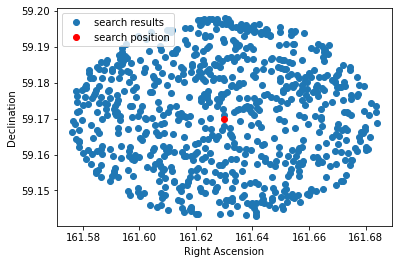

In [8]:
plt.plot(masterlist['ra'],masterlist['dec'], 'o',label='search results')
plt.plot(RA,Dec,'ro',label='search position')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.legend()

## Example 2: Get SPIRE cutouts for position
Having searched the HELP database to get sources, it would be useful to see what the SPIRE maps look like for this position. We can do that using the simple image access protocol (SIAP). SIAP is simple for maps that overlaps (or contains, or are contained by) a region of interest defined by a position and a radius. The cutout service has additional parameters as the `cutoutSize` that allows the server to return a link to a cropped version of the map.

We need the endpoint of the SIAP service of the cutout resource that can be found on https://herschel-vos.phys.sussex.ac.uk/herschel_maps/q/cutout/info

In [11]:
cutout_service = vo.dal.SIAService(f"https://herschel-vos.phys.sussex.ac.uk/herschel_maps/q/cutout/siap.xml")


We can ask for the service parameters that are additional to the standard SIAP parameters:

In [12]:
cutout_service.params


[<PARAM ID="INPUT_POS" arraysize="*" datatype="char" name="INPUT:POS" ucd="pos.eq" unit="deg" value=""/>,
 <PARAM ID="INPUT_SIZE" arraysize="*" datatype="char" name="INPUT:SIZE" unit="deg" value=""/>,
 <PARAM ID="INPUT_INTERSECT" arraysize="*" datatype="char" name="INPUT:INTERSECT" value="OVERLAPS"/>,
 <PARAM ID="INPUT_FORMAT" arraysize="*" datatype="char" name="INPUT:FORMAT" value="GRAPHIC"/>,
 <PARAM ID="INPUT_bandpassId" arraysize="*" datatype="char" name="INPUT:bandpassId" ucd="VOX:BandPass_ID" value=""/>,
 <PARAM ID="INPUT_type" arraysize="*" datatype="char" name="INPUT:type" ucd="meta.code" value=""/>,
 <PARAM ID="INPUT_cutoutSize" datatype="float" name="INPUT:cutoutSize" unit="deg" value="0.1"/>,
 <PARAM ID="INPUT_RESPONSEFORMAT" arraysize="*" datatype="char" name="INPUT:RESPONSEFORMAT" ucd="meta.code.mime" value=""/>,
 <PARAM ID="INPUT_MAXREC" datatype="int" name="INPUT:MAXREC" value="0"/>,
 <PARAM ID="INPUT_VERB" datatype="int" name="INPUT:VERB" value="0"/>]

As we can see, there is `cutoutSize` that is used the give the size of the cutout we want but there are also parameters added by HELP:
*  `type` which defines that kind of image: `image`, `error`, or `exposure`
*  `bandpassId` that identifies the SPIRE band: `SPIRE250`, `SPIRE350`, or `SPIRE500`.

Note that there are two size parameters: `size` is the radius defining the region of interest around the position that is used to look for maps. It's a standard SIAP parameter and is given with its associated unit; `cutoutSize` is the width of the cutout around the position the user want in the maps overlapping the region of interest; it may be different than the size (and should be double the radius if you want the cutout corresponding to the searched region) and must be given in degrees without units.

Let's look for the SPIRE250 image and error maps.

In [15]:
pos = SkyCoord(RA * u.deg, Dec * u.deg)


In [16]:
images = cutout_service.search(
    pos=pos, 
    size=radius, 
    cutoutSize=2*radius,
    bandpassId='SPIRE250',
    type=['image', 'error']
)

the result is a pyvo.dal.sia.SIAResults that can be converted to a table.



In [17]:
images = images.to_table()
images

accref,mime,accsize,centerAlpha,centerDelta,imageTitle,instId,dateObs,nAxes,pixelSize,pixelScale,refFrame,wcs_equinox,wcs_projection,wcs_refPixel,wcs_refValues,wcs_cdmatrix,bandpassId,bandpassUnit,bandpassRefval,bandpassHi,bandpassLo,pixflags,coverage,field,type
,,byte,deg,deg,,,d,,pix,deg / pix,,yr,,pix,deg,deg / pix,,,m,m,m,,deg,,
object,object,int32,float64,float64,object,object,float64,int32,object,object,object,float32,str3,object,object,object,object,object,float64,float64,float64,object,object,object,object
https://herschel-vos.phys.sussex.ac.uk/getproduct/herschel_maps/data/Lockman-NEST_error_250_SMAP_v6.0.fits?sdec=0.056&dec=59.17&ra=161.63&sra=0.109269882158,image/fits,2259,161.63,59.17,Lockman-SWIRE SPIRE250 (error),SPIRE,--,2,[3757 3502],[0.00166667 0.00166667],ICRS,2000.0,TAN,[16.693389221607504 -16.911389575368048],[161.63 59.17],[-0.00166667 0.0 0.0 0.00166667],SPIRE250,m,--,--,--,,[166.6955173810341 55.01985901923391 167.6573019612306 60.81886471892404 154.82768339076915 60.81886471892404 155.7894679709656 55.01985901923391],Lockman-SWIRE,error
https://herschel-vos.phys.sussex.ac.uk/getproduct/herschel_maps/data/Lockman-NEST_image_250_SMAP_v6.0.fits?sdec=0.056&dec=59.17&ra=161.63&sra=0.109269882158,image/fits,2259,161.63,59.17,Lockman-SWIRE SPIRE250 (image),SPIRE,--,2,[3757 3502],[0.00166667 0.00166667],ICRS,2000.0,TAN,[16.693389221607504 -16.911389575368048],[161.63 59.17],[-0.00166667 0.0 0.0 0.00166667],SPIRE250,m,--,--,--,,[166.6955173810341 55.01985901923391 167.6573019612306 60.81886471892404 154.82768339076915 60.81886471892404 155.7894679709656 55.01985901923391],Lockman-SWIRE,image
https://herschel-vos.phys.sussex.ac.uk/getproduct/herschel_maps/data/Lockman_error_250_SMAP_v6.0.fits?sdec=0.056&dec=59.17&ra=161.63&sra=0.109269882158,image/fits,2259,161.63,59.17,Lockman-SWIRE (shallow) SPIRE250 (error),SPIRE,--,2,[3757 3502],[0.00166667 0.00166667],ICRS,2000.0,TAN,[16.693389221607504 -16.911389575368048],[161.63 59.17],[-0.00166667 0.0 0.0 0.00166667],SPIRE250,m,--,--,--,,[166.6955173810341 55.01985901923391 167.6573019612306 60.81886471892404 154.82768339076915 60.81886471892404 155.7894679709656 55.01985901923391],Lockman-SWIRE,error
https://herschel-vos.phys.sussex.ac.uk/getproduct/herschel_maps/data/Lockman_image_250_SMAP_v6.0.fits?sdec=0.056&dec=59.17&ra=161.63&sra=0.109269882158,image/fits,2259,161.63,59.17,Lockman-SWIRE (shallow) SPIRE250 (image),SPIRE,--,2,[3757 3502],[0.00166667 0.00166667],ICRS,2000.0,TAN,[16.693389221607504 -16.911389575368048],[161.63 59.17],[-0.00166667 0.0 0.0 0.00166667],SPIRE250,m,--,--,--,,[166.6955173810341 55.01985901923391 167.6573019612306 60.81886471892404 154.82768339076915 60.81886471892404 155.7894679709656 55.01985901923391],Lockman-SWIRE,image


We can see that the URL to the cutout FITS is in the accref column. We can feed the URL directly to fits.open to get directly the image. We have two files for both `image` and `error` in the Lockman Swire field, a shallow and deep (nested) version. We will use the deep version.



In [22]:
spire250_image_map = fits.open(
    images[images['type'] == 'image'][1]['accref'])

Lets plot our map using the astronomy plotting Python module [`aplpy`](https://aplpy.github.io/) and plot the sources we found using the VOX server.

INFO: Auto-setting vmin to -1.595e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.570e-02 [aplpy.core]


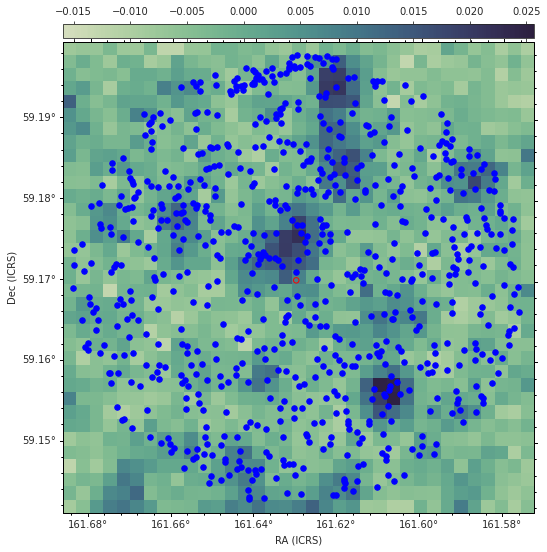

In [33]:
sns.set_style("white")
cmap=sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)
fig=aplpy.FITSFigure(spire250_image_map)
fig.show_colorscale(cmap=cmap)
fig.show_markers(RA,Dec)
fig.show_markers(masterlist['ra'],masterlist['dec'], edgecolor='blue', facecolor='blue')
fig.tick_labels.set_xformat('dd.dd')
fig.tick_labels.set_yformat('dd.dd')
fig.add_colorbar()
fig.colorbar.set_location('top')

As you can see here, the resolution of the SPIRE map compared to the number of sources is very low, and leads to the problem of source confusion (not knowing what the sources in the SPIRE map correspond to the sources from masterlist). We developed [XID+](www.herschel.sussex.ac.uk/XID_plus); a probabilistic deblender to deal with this problem. Other examples demonstrate how to use XID+.

### Exploring the dataset
Now that we have got our returned table and image, we can explore some of the columns and properties contained within the table, for example we can look at the distributions of photometric redshifts

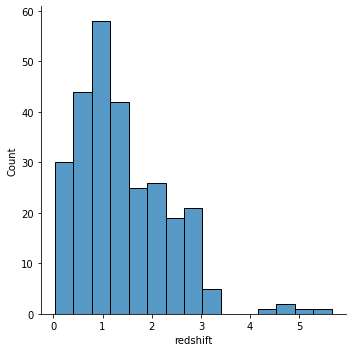

In [18]:
sns.displot(x=masterlist['redshift'])


Look at distributions of SPIRE flux

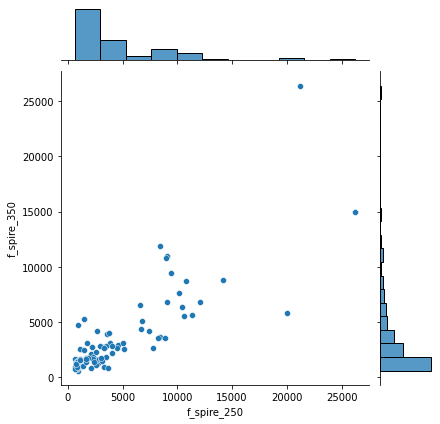

In [19]:
sns.jointplot(x=masterlist['f_spire_250'],y=masterlist['f_spire_350'])

See how many objects have SED fits with CIGALE. We do this by seeing where `cigale_mstar` is masked, and inverting. This will give us a boolean array, where objects with fits are now TRUE. We can now sum this array to get how many of the objects have fits

In [20]:
print('there are {} objects out of {} with cigale fits'.format(np.invert(masterlist['cigale_mstar'].mask).sum(),len(masterlist)))

there are 5 objects out of 748 with cigale fits


CIGALE has physical parameters such as starformation rate and stellar mass, lets look at the joint distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


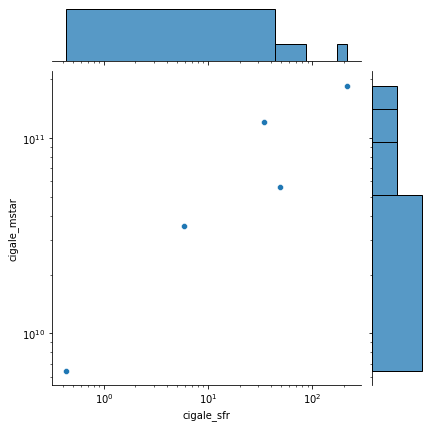

In [21]:
g=sns.jointplot(masterlist['cigale_sfr'],masterlist['cigale_mstar'])
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')


This notebook is a brief introduction into using both the TAP and SIAP protocols for accessing catalogue and image data from HELP's VOX. We encourage you to use these notebooks to create more complex queries and exploit the HELP data for science.

Other example notebooks demonstrate some other useful queries and how to use other HELP tools such as [XID+](www.herschel.sussex.ac.uk)

![](https://avatars1.githubusercontent.com/u/7880370?s=75&v=4)

**Authors**: Peter Hurley

The Herschel Extragalactic Legacy Project, (HELP), is a European Commission Research Executive Agency funded project under the SP1-Cooperation, Collaborative project, Small or medium-scale focused research project, FP7-SPACE-2013-1 scheme, Grant Agreement Number 607254.

